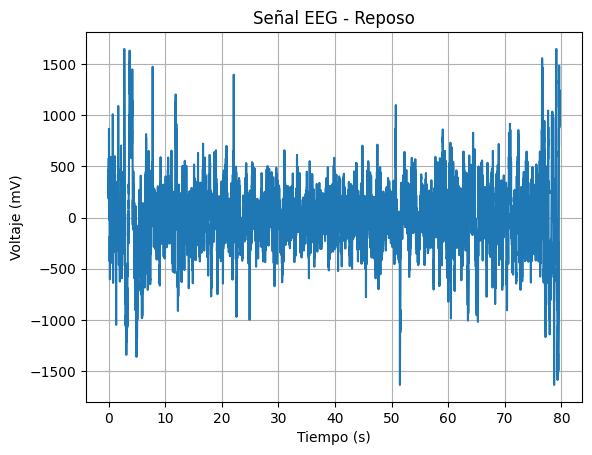

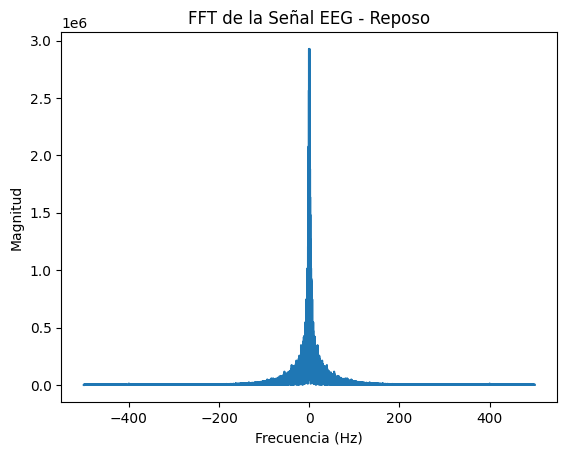

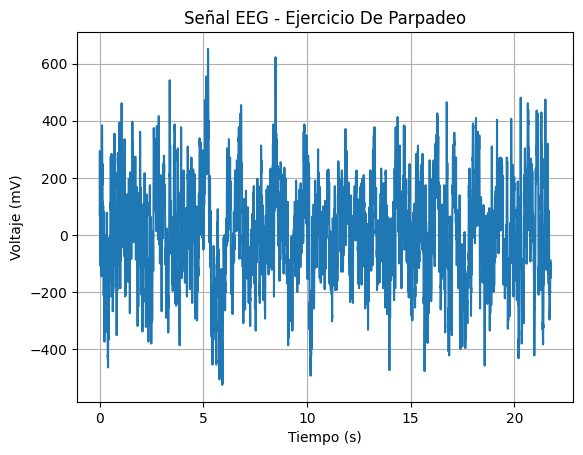

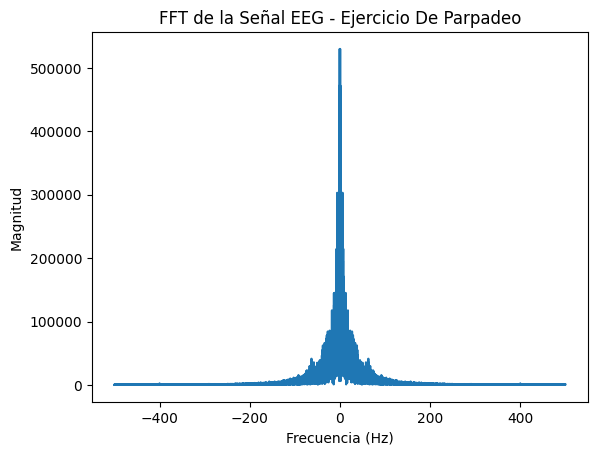

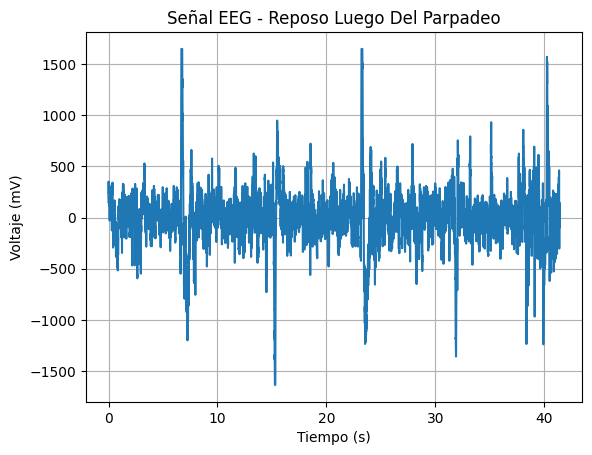

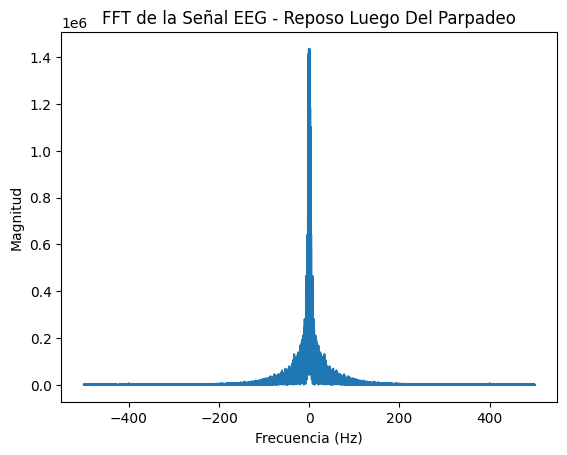

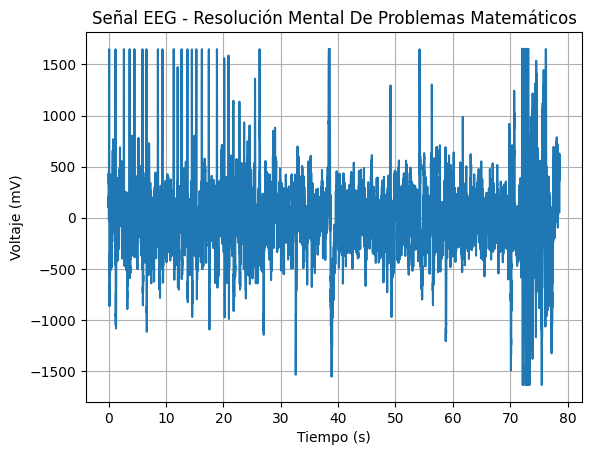

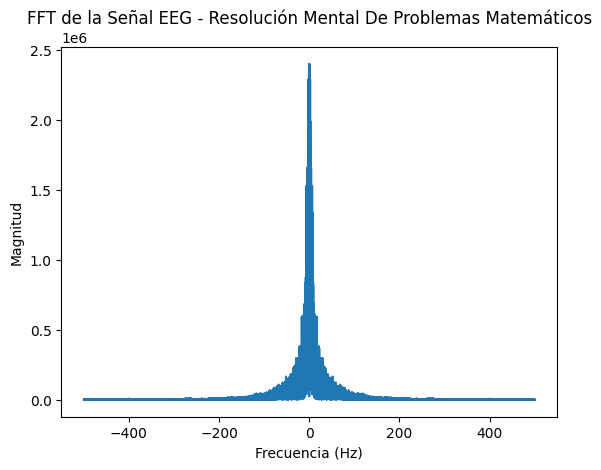

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
archivos = ['reposo.txt', 'ejercicio_de_parpadeo.txt', 'reposo_luego_del_parpadeo.txt', 'resolución_mental_de_problemas_matemáticos.txt']
for archivo in archivos:
  # Cargar los datos de la señal EEG desde el archivo de texto
  EEG_data = np.loadtxt(archivo)
  # Seleccionar la última columna que contiene los valores de la señal EEG
  columna_EEG = EEG_data[:, -1]
  """Debido a que la señal muestreada por el EEG del BiTalino son del ADC de 10 bits; entonces esta data oscila
  de 0-1023. Pero considerando que el voltaje de operación es de 3.3V, se debe hacer una conversión de 0-1023 a 0-3.3V"""
  v = ((columna_EEG-507)/1023)*3.3*1000
  """Dado que el BiTalino te brinda el total de datos y no el tiempo, podemos obtener
  la duración del muestreo gracias a la frecuencia de meustreo del BiTalino: 1000 Hz"""
  fs = 1000
  N = len(v)
  """Teniendo la duración y la cantidad de muestreo, se realizó otra lista para el eje X
  que equivale al Tiempo, con intervalos iguales para obtener un tamaño de lista igual al del Eje Y"""
  t = np.linspace(0, N/fs, N)
  #Plotear la señal EEG en el dominio del tiempo
  plt.plot(t, v)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Señal EEG - '+archivo.replace('_', ' ').replace('.txt', '').title())
  plt.grid()
  plt.show()
  #FFT
  f = np.linspace(-fs/2, fs/2, N)
  V = np.fft.fftshift(np.fft.fft(v))
  plt.plot(f, abs(V))
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Magnitud')
  plt.title('FFT de la Señal EEG - '+archivo.replace('_', ' ').replace('.txt', '').title())
  plt.show()

FILTRO WAVELET

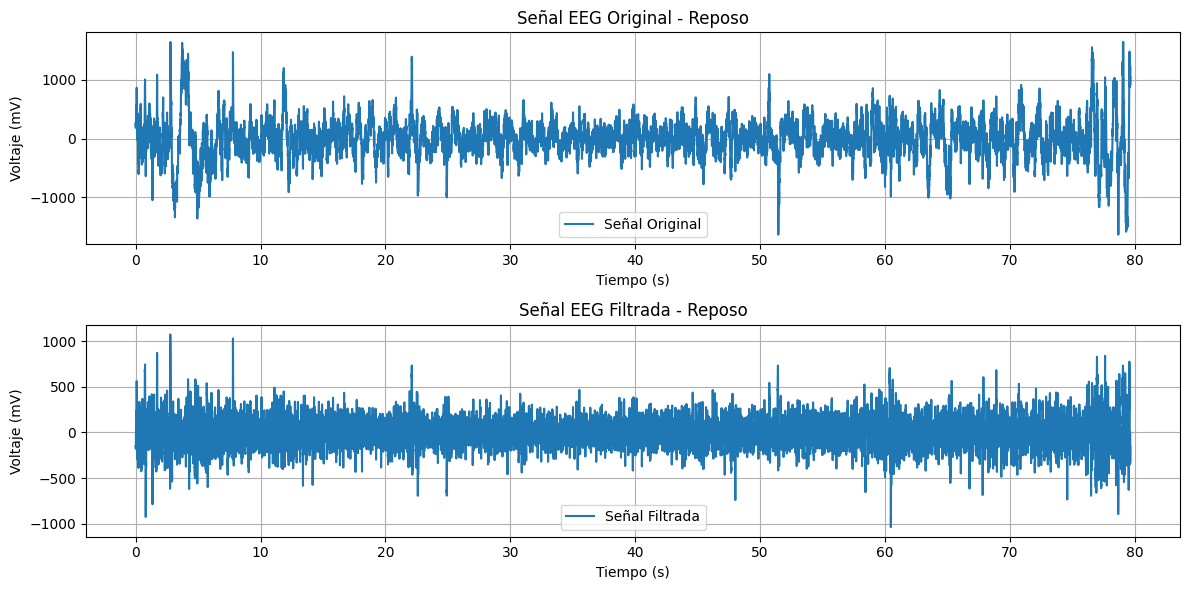

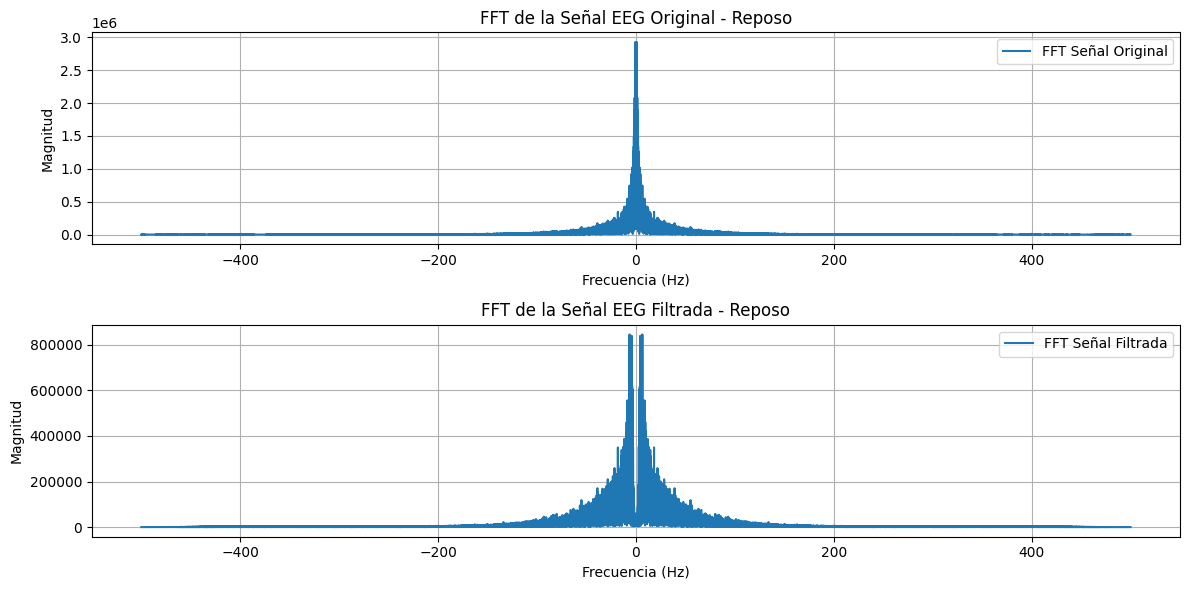

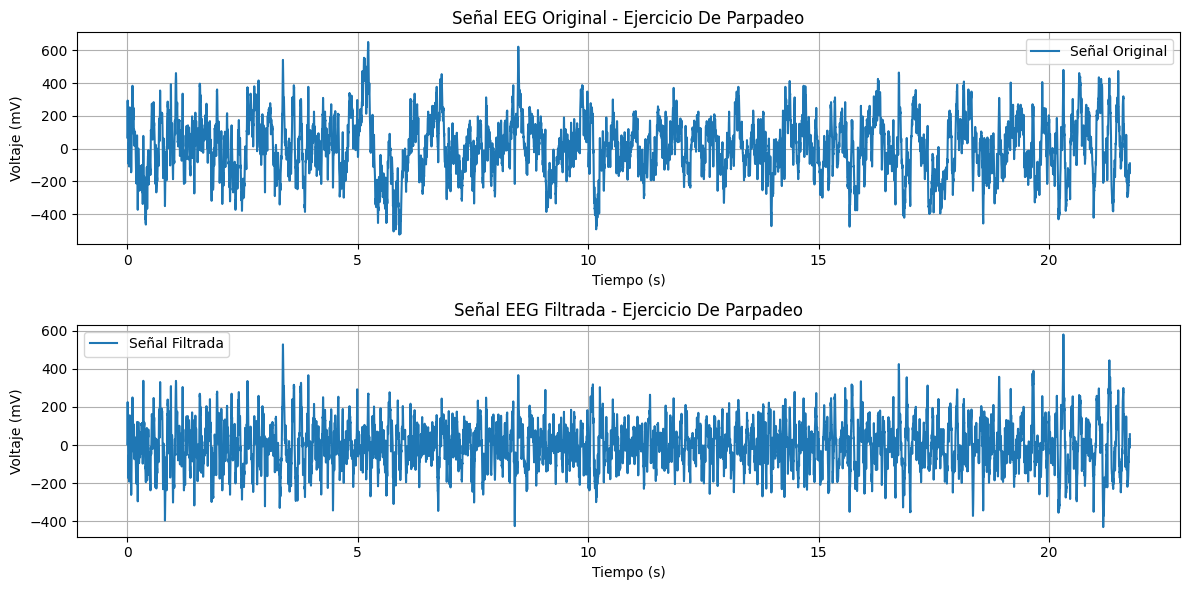

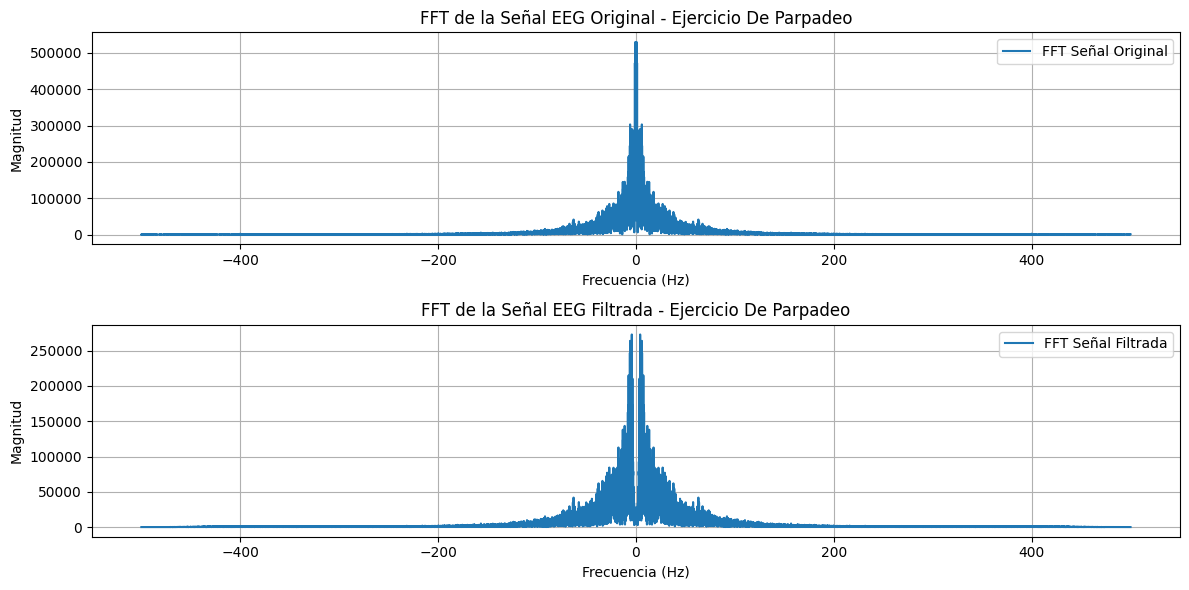

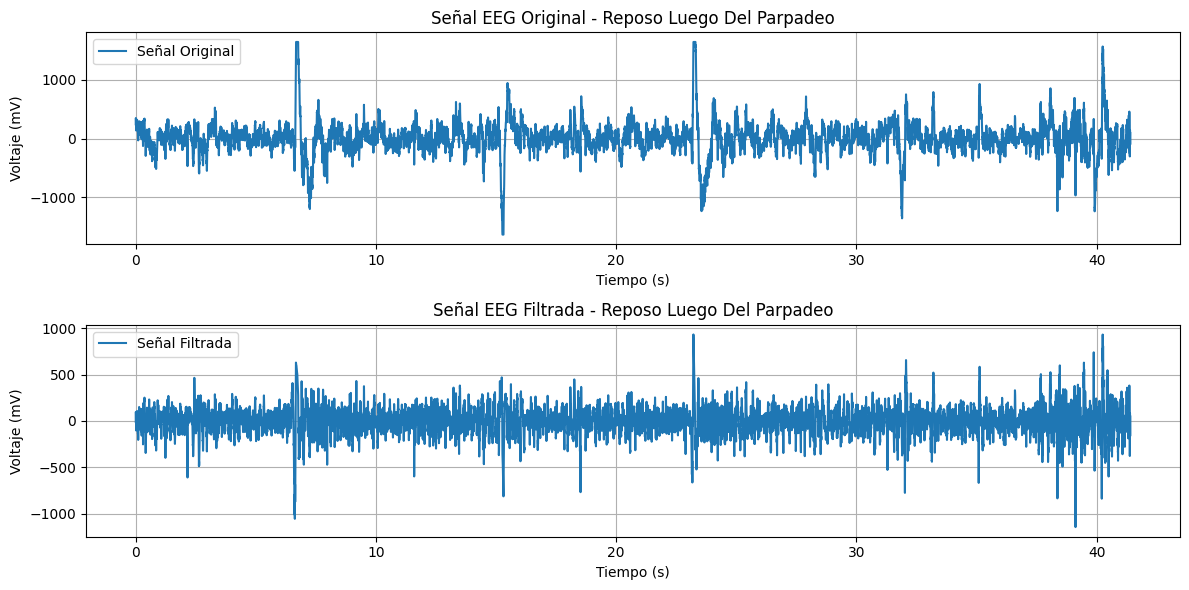

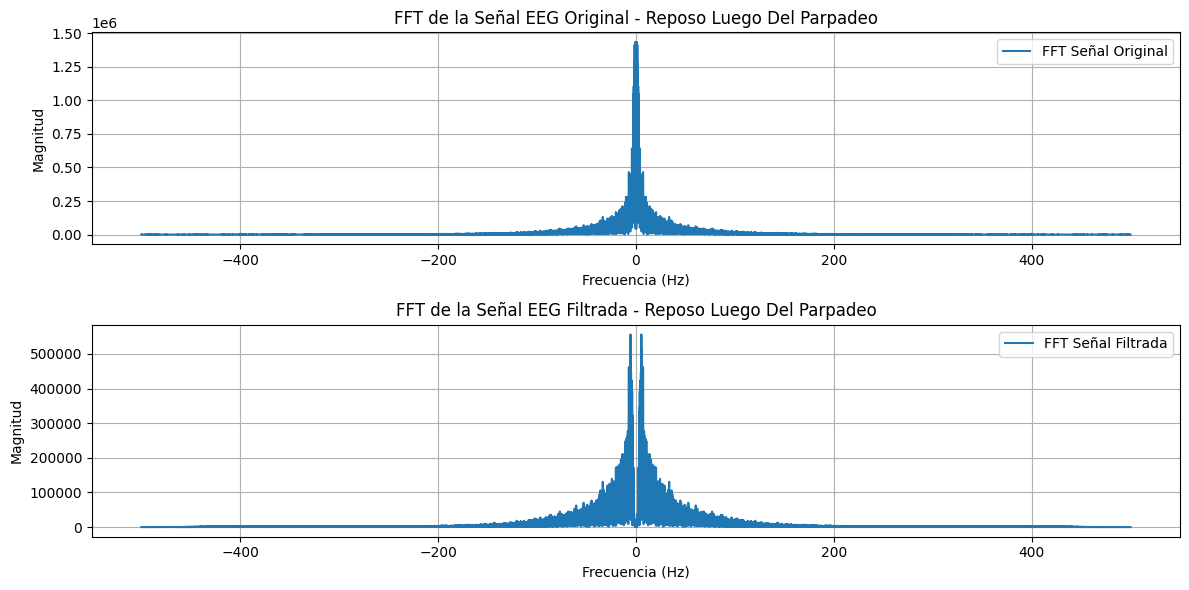

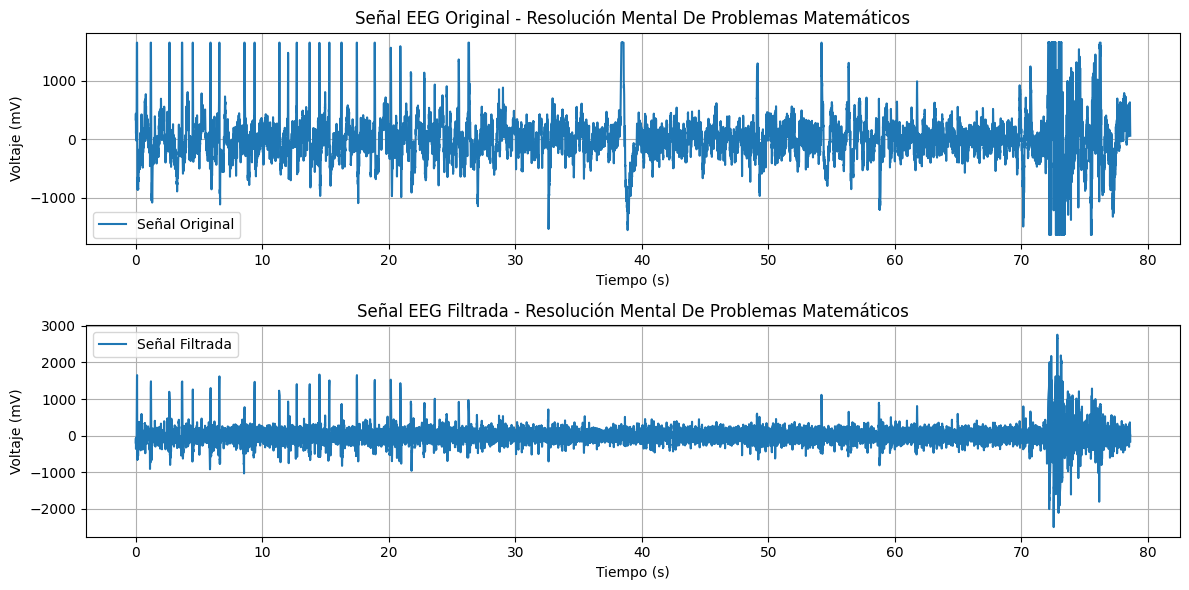

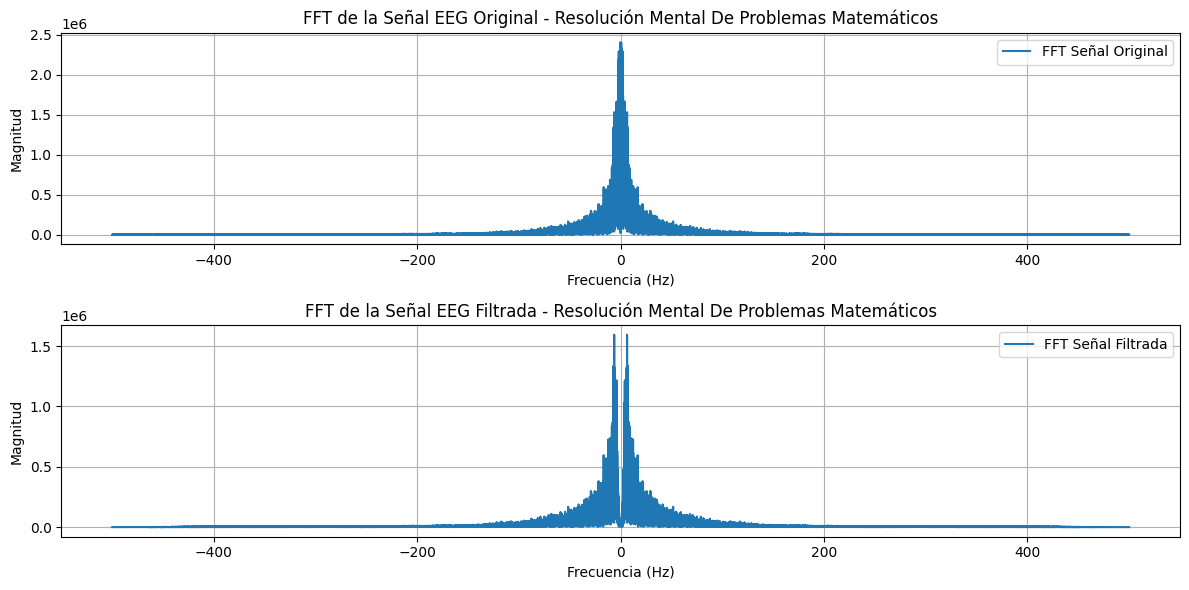

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Función para realizar y plotear el filtro wavelet
def aplicar_filtro_wavelet(archivo):
    # Cargar los datos de la señal EEG desde el archivo de texto
    EEG_data = np.loadtxt(archivo)
    # Seleccionar la última columna que contiene los valores de la señal EEG
    columna_EEG = EEG_data[:, -1]
    # Convertir los datos del rango 0-1023 a voltaje en mV
    v = ((columna_EEG - 507) / 1023) * 3.3 * 1000
    # Parámetros de la señal
    fs = 1000
    N = len(v)
    t = np.linspace(0, N/fs, N)

    # Aplicar la Transformada Wavelet
    wavelet = 'sym3'
    level = 8
    coeffs = pywt.wavedec(v, wavelet, level=level)

    # Eliminar coeficientes específicos D1, D8 y A8
    coeffs[0] = np.zeros_like(coeffs[0])  # A8
    coeffs[1] = np.zeros_like(coeffs[1])  # D8
    coeffs[-1] = np.zeros_like(coeffs[-1])  # D1

    # Reconstrucción de la señal filtrada
    v_filtrada = pywt.waverec(coeffs, wavelet)

    # Plotear la señal original y filtrada en el dominio del tiempo
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, v, label='Señal Original')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (mV)')
    plt.title('Señal EEG Original - ' + archivo.replace('_', ' ').replace('.txt', '').title())
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(t, v_filtrada, label='Señal Filtrada')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (mV)')
    plt.title('Señal EEG Filtrada - ' + archivo.replace('_', ' ').replace('.txt', '').title())
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # FFT de la señal original y filtrada
    f = np.linspace(-fs/2, fs/2, N)
    V = np.fft.fftshift(np.fft.fft(v))
    V_filtrada = np.fft.fftshift(np.fft.fft(v_filtrada))

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(f, np.abs(V), label='FFT Señal Original')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('FFT de la Señal EEG Original - ' + archivo.replace('_', ' ').replace('.txt', '').title())
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(f, np.abs(V_filtrada), label='FFT Señal Filtrada')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('FFT de la Señal EEG Filtrada - ' + archivo.replace('_', ' ').replace('.txt', '').title())
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Lista de archivos
archivos = ['reposo.txt', 'ejercicio_de_parpadeo.txt', 'reposo_luego_del_parpadeo.txt', 'resolución_mental_de_problemas_matemáticos.txt']

# Aplicar el filtro wavelet a cada archivo
for archivo in archivos:
    aplicar_filtro_wavelet(archivo)
